In [4]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import torch.optim as optim

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA


In [5]:
device = torch.device("cuda:0")
EV_Title = pd.DataFrame(pd.read_csv('Electric_Vehicle_Title_and_Registration_Activity.csv'))
EV_Title.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,DOL Transaction Date,Transaction Type,Transaction Year,...,Legislative District,2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility,Meets 2019 HB 2042 Electric Range Requirement,Meets 2019 HB 2042 Sale Date Requirement,Meets 2019 HB 2042 Sale Price/Value Requirement,Odometer Reading,Odometer Code,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract
0,Battery Electric Vehicle (BEV),WMWXP3C0XM,2021,MINI,Hardtop,Used,0,August 04 2022,Registration Renewal,2022,...,45.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,Yes,No,5.303302e+10
1,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,Used,0,November 19 2021,Registration Renewal,2021,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,Yes,5.303300e+10
2,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,New,26999,December 31 2018,Original Title,2018,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,True,17,Actual Mileage,Not Applicable,Not Applicable,5.303300e+10
3,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,New,0,December 31 2018,Original Registration,2018,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,No,5.303300e+10
4,Plug-in Hybrid Electric Vehicle (PHEV),KNDCM3LD1J,2018,KIA,Niro,Used,0,December 23 2019,Registration Renewal,2019,...,36.0,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,Yes,5.303300e+10


In [6]:
features = ['VIN (1-10)','Transaction Type', 'Transaction Year', 'Postal Code']
EV_Title = EV_Title[features]
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
0,WMWXP3C0XM,Registration Renewal,2022,98072.0
1,KNDCM3LD1J,Registration Renewal,2021,98103.0
2,KNDCM3LD1J,Original Title,2018,98103.0
3,KNDCM3LD1J,Original Registration,2018,98103.0
4,KNDCM3LD1J,Registration Renewal,2019,98103.0


In [7]:
EV_Title = EV_Title[EV_Title['Transaction Type'] == 'Original Title']
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
2,KNDCM3LD1J,Original Title,2018,98103.0
6,JTDKARFP1J,Original Title,2018,98311.0
7,5YJ3E1EA3J,Original Title,2018,98034.0
13,5YJ3E1EC9N,Original Title,2022,98006.0
16,1G1FZ6S00K,Original Title,2018,98006.0


In [8]:
EV_Title.drop_duplicates(subset = "VIN (1-10)",keep = False, inplace= True) ##dropping duplicate vins
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
336,WP0CD2Y13N,Original Title,2022,98290.0
1522,5YJRE1A38A,Original Title,2020,98119.0
1693,KMHC75LD4N,Original Title,2022,98029.0
2486,WAUUPBFF4J,Original Title,2019,98107.0
2833,WMEFJ9BA9K,Original Title,2019,98040.0


In [9]:
features = ['Transaction Year']
EV_Title_Year = EV_Title[features]
EV_Title_Year.head()

,Transaction Year
336,2022
1522,2020
1693,2022
2486,2019
2833,2019


In [18]:
#sns.scatterplot(EV_Title_Year)

In [11]:
#np.amin(EV_Title_Year)

In [12]:
def findingyears(year):
    x=np.where(EV_Title_Year == year)
    return x

In [13]:
arr = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 
arr1 = []

for i in range(len(arr)):
    x = findingyears(arr[i])
    x = np.array(x)
    arr1.append(x.size/2)
#EV_Title_Year.insert(loc = 2, column = "Number of EV", value = arr1)
arr1

[3.0, 13.0, 14.0, 19.0, 17.0, 31.0, 38.0, 64.0, 103.0, 149.0, 183.0]

In [14]:
zipped = list(zip(arr, arr1))
df = pd.DataFrame(zipped, columns=['Year', 'Total_Sold'])
df.head()

,Year,Total_Sold
0,2010,3.0
1,2011,13.0
2,2012,14.0
3,2013,19.0
4,2014,17.0


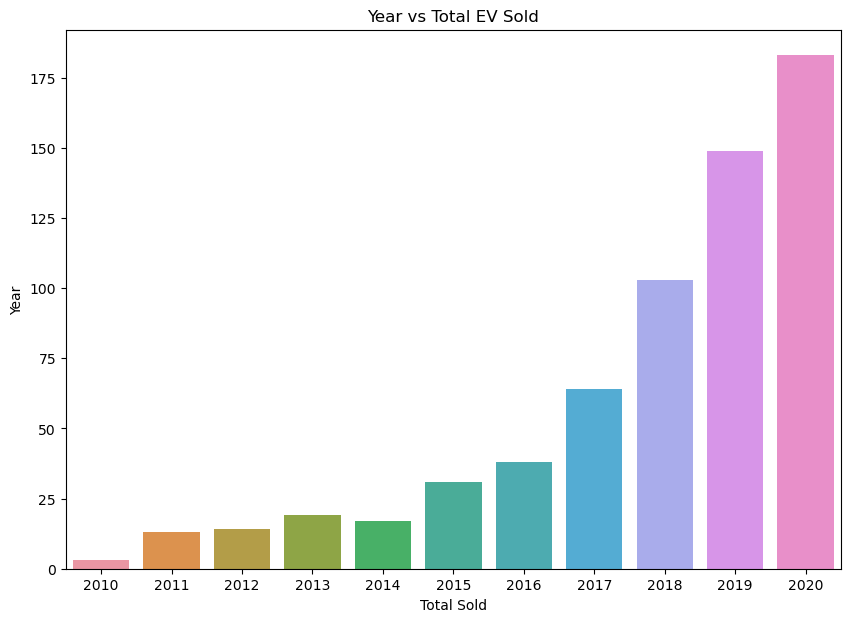

In [15]:
fig=plt.figure(figsize = (10, 7))
sns.barplot(x="Year", y="Total_Sold", data=df)
plt.title('Year vs Total EV Sold')
plt.xlabel('Total Sold')
plt.ylabel('Year')
plt.show()

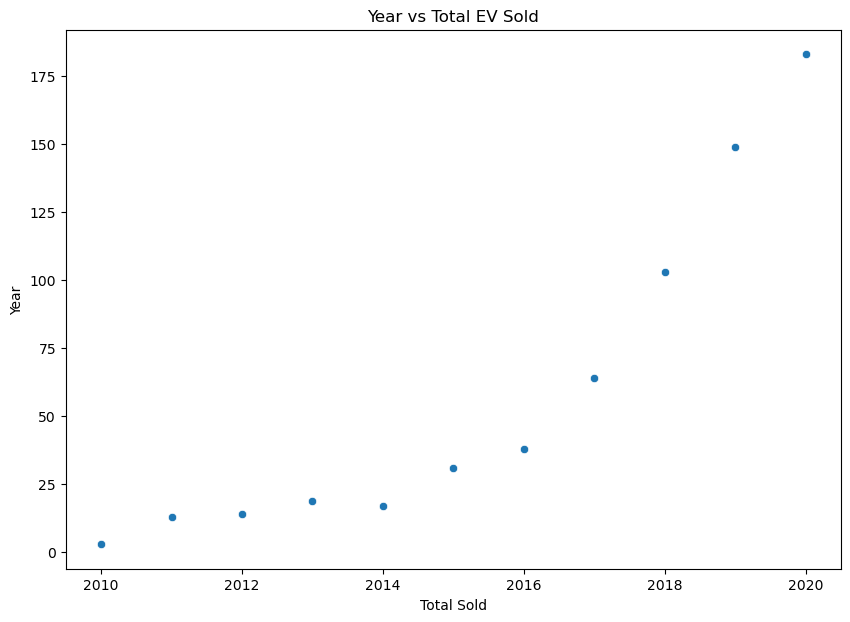

In [16]:
fig=plt.figure(figsize = (10, 7))
sns.scatterplot(x="Year", y="Total_Sold", data=df)
plt.title('Year vs Total EV Sold')
plt.xlabel('Total Sold')
plt.ylabel('Year')
plt.show()

In [19]:
X=np.array(df["Year"].values)
y=np.array(df["Total_Sold"].values)

X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
  
print (xtrain[0:10, :])

[[ 1.5430335]
 [ 0.3086067]
 [-1.2344268]
 [ 0.6172134]
 [ 0.9258201]
 [-0.6172134]
 [-1.5430335]
 [ 0.       ]]


In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

LogisticRegression(random_state=0)

In [28]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(xtrain, y_train)

In [29]:
model.classes_

array([  3.,  13.,  19.,  31.,  38.,  64., 103., 183.])

In [30]:
model.intercept_

array([-1.11239278, -1.09351406, -1.06802572, -1.05939722, -1.06159478,
       -1.06824659, -1.07944549, -1.11582732])

In [31]:
model.coef_

array([[-6.18448638e-01],
       [-4.91472448e-01],
       [-2.43878763e-01],
       [ 6.17172976e-17],
       [ 1.22430906e-01],
       [ 2.46229833e-01],
       [ 3.72193453e-01],
       [ 6.33915111e-01]])

In [34]:
model.predict_proba(X_train)

array([[0.00000000e+000, 0.00000000e+000, 9.08466726e-216,
        6.04648782e-002, 2.34883780e-001, 2.34883780e-001,
        2.34883780e-001, 2.34883780e-001],
       [0.00000000e+000, 0.00000000e+000, 2.40973802e-215,
        6.04648782e-002, 2.34883780e-001, 2.34883780e-001,
        2.34883780e-001, 2.34883780e-001],
       [0.00000000e+000, 0.00000000e+000, 8.15728875e-215,
        6.04648782e-002, 2.34883780e-001, 2.34883780e-001,
        2.34883780e-001, 2.34883780e-001],
       [0.00000000e+000, 0.00000000e+000, 1.88822885e-215,
        6.04648782e-002, 2.34883780e-001, 2.34883780e-001,
        2.34883780e-001, 2.34883780e-001],
       [0.00000000e+000, 0.00000000e+000, 1.47958332e-215,
        6.04648782e-002, 2.34883780e-001, 2.34883780e-001,
        2.34883780e-001, 2.34883780e-001],
       [0.00000000e+000, 0.00000000e+000, 5.00858944e-215,
        6.04648782e-002, 2.34883780e-001, 2.34883780e-001,
        2.34883780e-001, 2.34883780e-001],
       [0.00000000e+000, 0.0000000

In [35]:
model.predict(X_train)

array([183., 183., 183., 183., 183., 183., 183., 183.])